 # Intrusion Detection System with deep learning

In [2]:
#Import neccessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
monday_data = pd.read_csv("/content/drive/MyDrive/engEdosa/Dataset/Monday-WorkingHours.pcap_ISCX.csv")
tuesday_data = pd.read_csv("/content/drive/MyDrive/engEdosa/Dataset/Tuesday-WorkingHours.pcap_ISCX.csv")
wednesday_data = pd.read_csv("/content/drive/MyDrive/engEdosa/Dataset/Wednesday-workingHours.pcap_ISCX.csv")
thursday_data_1 = pd.read_csv("/content/drive/MyDrive/engEdosa/Dataset/Thursday-WorkingHours-Morning-WebAttacks.pcap_ISCX.csv")
thursday_data_2 = pd.read_csv("/content/drive/MyDrive/engEdosa/Dataset/Thursday-WorkingHours-Afternoon-Infilteration.pcap_ISCX.csv")
friday_data_1 = pd.read_csv("/content/drive/MyDrive/engEdosa/Dataset/Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv")
friday_data_2 = pd.read_csv("/content/drive/MyDrive/engEdosa/Dataset/Friday-WorkingHours-Afternoon-PortScan.pcap_ISCX.csv")
friday_data_3 = pd.read_csv("/content/drive/MyDrive/engEdosa/Dataset/Friday-WorkingHours-Morning.pcap_ISCX.csv")

In [ ]:
# wednesday_data.columns

In [ ]:
thursday_data_1.shape

(170366, 79)

In [ ]:
data_details = {
    "monday_details":monday_data[' Label'].value_counts(),
     "tuesday_details":tuesday_data[' Label'].value_counts(),
      "wednesday_details":wednesday_data[' Label'].value_counts(),
       "thursday_details_1":thursday_data_1[' Label'].value_counts(),
       "thursday_details_2":thursday_data_2[' Label'].value_counts(),
       "friday_details_1":friday_data_1[' Label'].value_counts(),
       "friday_details_2":friday_data_2[' Label'].value_counts(),
       "friday_details_3":friday_data_3[' Label'].value_counts()
}


In [ ]:
data_details

{'friday_details_1': DDoS      128027
 BENIGN     97718
 Name:  Label, dtype: int64, 'friday_details_2': PortScan    158930
 BENIGN      127537
 Name:  Label, dtype: int64, 'friday_details_3': BENIGN    189067
 Bot         1966
 Name:  Label, dtype: int64, 'monday_details': BENIGN    529918
 Name:  Label, dtype: int64, 'thursday_details_1': BENIGN                        168186
 Web Attack � Brute Force        1507
 Web Attack � XSS                 652
 Web Attack � Sql Injection        21
 Name:  Label, dtype: int64, 'thursday_details_2': BENIGN          288566
 Infiltration        36
 Name:  Label, dtype: int64, 'tuesday_details': BENIGN         432074
 FTP-Patator      7938
 SSH-Patator      5897
 Name:  Label, dtype: int64, 'wednesday_details': BENIGN              440031
 DoS Hulk            231073
 DoS GoldenEye        10293
 DoS slowloris         5796
 DoS Slowhttptest      5499
 Heartbleed              11
 Name:  Label, dtype: int64}

In [ ]:
frames = [wednesday_data, friday_data_1, friday_data_2]

In [ ]:
data = pd.concat(frames)

In [ ]:
data.shape

(1204915, 79)

In [ ]:
#data.describe()

In [ ]:
data[' Label'].value_counts()

BENIGN              665286
DoS Hulk            231073
PortScan            158930
DDoS                128027
DoS GoldenEye        10293
DoS slowloris         5796
DoS Slowhttptest      5499
Heartbleed              11
Name:  Label, dtype: int64

In [ ]:
#data.sample(10)

In [ ]:
# # Getting a sense of what the distribution of each column looks like
# fig = plt.figure(figsize=(15,10))

# ax1 = fig.add_subplot(221)
# data[' Label'].value_counts().plot(kind='bar', ax=ax1)
# ax1.set_ylabel('Count')
# ax1.set_title('Label');

# plt.tight_layout()
# plt.show()

In [ ]:
# data.isna().sum()

In [ ]:
np.isinf(data[" Flow Duration"]).sum()

0

In [ ]:
max_flow_bytes = data.loc[data['Flow Bytes/s'] != np.inf, 'Flow Bytes/s'].max()
max_flow_pkts = data.loc[data[' Flow Packets/s'] != np.inf, ' Flow Packets/s'].max()

print(max_flow_bytes, max_flow_pkts)

2070000000.0 3000000.0


In [ ]:
data['Flow Bytes/s'].replace(np.inf,max_flow_bytes+1,inplace=True)
data[' Flow Packets/s'].replace(np.inf,max_flow_pkts+1,inplace=True)

In [ ]:
data[' Label'].value_counts()
#data[['Date','Time']] = data['Timestamp'].str.split(expand=True)

BENIGN              665286
DoS Hulk            231073
PortScan            158930
DDoS                128027
DoS GoldenEye        10293
DoS slowloris         5796
DoS Slowhttptest      5499
Heartbleed              11
Name:  Label, dtype: int64

In [ ]:
Mal = {'BENIGN':0, 'FTP-Patator':1, 'SSH-Patator':1, 'DoS slowloris':1,
       'DoS Slowhttptest':1, 'DoS Hulk':1, 'DoS GoldenEye':1, 'Heartbleed':1,
       'Web Attack � Brute Force':1, 'Web Attack � XSS':1,
       'Web Attack � Sql Injection':1, 'Infiltration':1, 'DDoS':1, 'PortScan':1,
       'Bot':1}
data[' Label'] = [Mal[item] for item in data[' Label']]

In [ ]:

# # Getting a sense of what the distribution of each column looks like
# fig = plt.figure(figsize=(15,10))

# ax1 = fig.add_subplot(221)
# data[' Label'].value_counts().plot(kind='bar', ax=ax1)
# ax1.set_ylabel('Count')
# ax1.set_title('Label');

# plt.tight_layout()
# plt.show()

In [ ]:
data.shape

(1204915, 79)

In [ ]:
data.columns = data.columns.str.strip()
df = data.drop(columns=["Fwd Header Length.1"])
df.shape


(1204915, 78)

In [ ]:
df['Label'].value_counts()

0    665286
1    539629
Name: Label, dtype: int64

In [ ]:
df.replace('Infinity', -1, inplace=True)
df[["Flow Bytes/s", "Flow Packets/s"]] = df[["Flow Bytes/s", "Flow Packets/s"]].apply(pd.to_numeric)

In [ ]:
df.replace([np.nan], -1, inplace=True)

In [ ]:
# df.describe()

In [ ]:
# df.to_csv("/content/drive/MyDrive/engEdosa/Dataset/web_attacks_unbalanced.csv", index=False)
# df['Label'].value_counts()

In [ ]:
benign_total = len(df[df['Label'] == 0])
attack_total = len(df[df['Label'] != 0])
attack_total

539629

In [ ]:
df.tail()

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,Bwd Packet Length Min,Bwd Packet Length Mean,Bwd Packet Length Std,Flow Bytes/s,Flow Packets/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Total,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Total,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Bwd PSH Flags,Fwd URG Flags,Bwd URG Flags,Fwd Header Length,Bwd Header Length,Fwd Packets/s,Bwd Packets/s,Min Packet Length,Max Packet Length,Packet Length Mean,Packet Length Std,Packet Length Variance,FIN Flag Count,SYN Flag Count,RST Flag Count,PSH Flag Count,ACK Flag Count,URG Flag Count,CWE Flag Count,ECE Flag Count,Down/Up Ratio,Average Packet Size,Avg Fwd Segment Size,Avg Bwd Segment Size,Fwd Avg Bytes/Bulk,Fwd Avg Packets/Bulk,Fwd Avg Bulk Rate,Bwd Avg Bytes/Bulk,Bwd Avg Packets/Bulk,Bwd Avg Bulk Rate,Subflow Fwd Packets,Subflow Fwd Bytes,Subflow Bwd Packets,Subflow Bwd Bytes,Init_Win_bytes_forward,Init_Win_bytes_backward,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
191022,80,101773597,6,6,349,11595,349,0,58.166667,142.478653,4344,0,1932.5,1754.831473,117.358533,0.117909,9252145.182,3.060000e+07,102000000,1,102000000,20300000.0,4.540000e+07,102000000,1,141399,28279.8,56086.137630,128107,16,0,0,0,0,200,200,0.058954,0.058954,0,4344,918.769231,1498.680706,2.246044e+06,0,0,0,0,1,0,0,0,1,995.333333,58.166667,1932.5,0,0,0,0,0,0,6,349,6,11595,251,235,1,32,4.0,0.0,4,4,102000000.0,0.0,102000000,102000000,1
191022,593,51,2,2,4,12,2,2,2.000000,0.000000,6,6,6.0,0.000000,313725.490200,78431.372550,17.000,2.773085e+01,49,0,2,2.0,0.000000e+00,2,2,49,49.0,0.000000,49,49,0,0,0,0,48,40,39215.686270,39215.686270,2,6,3.600000,2.190890,4.800000e+00,0,0,0,1,0,0,0,0,1,4.500000,2.000000,6.0,0,0,0,0,0,0,2,4,2,12,1024,0,1,24,0.0,0.0,0,0,0.0,0.0,0,0,0
191022,80,5323866,5,0,30,0,6,6,6.000000,0.000000,0,0,0.0,0.000000,5.635003,0.939167,1330966.500,2.661268e+06,5322869,3,5323866,1330966.5,2.661268e+06,5322869,3,0,0.0,0.000000,0,0,0,0,0,0,100,0,0.939167,0.000000,6,6,6.000000,0.000000,0.000000e+00,0,0,0,0,1,0,0,0,0,7.200000,6.000000,0.0,0,0,0,0,0,0,5,30,0,0,256,-1,4,20,997.0,0.0,997,997,5322869.0,0.0,5322869,5322869,1
191022,49159,52,1,1,0,6,0,0,0.000000,0.000000,6,6,6.0,0.000000,115384.615400,38461.538460,52.000,0.000000e+00,52,52,0,0.0,0.000000e+00,0,0,0,0.0,0.000000,0,0,0,0,0,0,40,20,19230.769230,19230.769230,0,6,2.000000,3.464102,1.200000e+01,0,0,0,1,0,0,0,0,1,3.000000,0.000000,6.0,0,0,0,0,0,0,1,0,1,6,29200,0,0,40,0.0,0.0,0,0,0.0,0.0,0,0,1
191022,8080,997161,3,3,0,18,0,0,0.000000,0.000000,6,6,6.0,0.000000,18.051247,6.017082,199432.200,2.723464e+05,498649,499,996662,498331.0,1.234608e+03,499204,497458,996598,498299.0,1200.667314,499148,497450,0,0,0,0,92,60,3.008541,3.008541,0,6,2.571429,3.207135,1.028571e+01,0,0,0,1,0,0,0,0,1,3.000000,0.000000,6.0,0,0,0,0,0,0,3,0,3,18,8192,0,0,28,0.0,0.0,0,0,0.0,0.0,0,0,1


In [ ]:
df.to_csv("/content/drive/MyDrive/engEdosa/Dataset/web_attacks_balanced.csv", index=False)

In [4]:
df = pd.read_csv("/content/drive/MyDrive/engEdosa/Dataset/web_attacks_balanced.csv")

7 features (Flow ID, Source IP, Source Port, Destination IP, Destination Port, Protocol, Timestamp) are excluded from the dataset. The hypothesis is that the "shape" of the data being transmitted is more important than these attributes. In addition, ports and addresses can be substituted by an attacker, so it is better that the ML algorithm does not take these features into account in training [Kostas2018].

In [5]:
excluded = ['Flow ID', 'Source IP', 'Source Port', 'Destination IP', 'Destination Port', 'Protocol']
df = df.drop(columns=excluded, errors='ignore')

In [ ]:
df.columns

Index(['Flow Duration', 'Total Fwd Packets', 'Total Backward Packets',
       'Total Length of Fwd Packets', 'Total Length of Bwd Packets',
       'Fwd Packet Length Max', 'Fwd Packet Length Min',
       'Fwd Packet Length Mean', 'Fwd Packet Length Std',
       'Bwd Packet Length Max', 'Bwd Packet Length Min',
       'Bwd Packet Length Mean', 'Bwd Packet Length Std', 'Flow Bytes/s',
       'Flow Packets/s', 'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max',
       'Flow IAT Min', 'Fwd IAT Total', 'Fwd IAT Mean', 'Fwd IAT Std',
       'Fwd IAT Max', 'Fwd IAT Min', 'Bwd IAT Total', 'Bwd IAT Mean',
       'Bwd IAT Std', 'Bwd IAT Max', 'Bwd IAT Min', 'Fwd PSH Flags',
       'Bwd PSH Flags', 'Fwd URG Flags', 'Bwd URG Flags', 'Fwd Header Length',
       'Bwd Header Length', 'Fwd Packets/s', 'Bwd Packets/s',
       'Min Packet Length', 'Max Packet Length', 'Packet Length Mean',
       'Packet Length Std', 'Packet Length Variance', 'FIN Flag Count',
       'SYN Flag Count', 'RST Flag Count', 'PS

Below at the stage of importance estimation the "Init_Win_bytes_backward" feature has the maximum value. After viewing the source dataset, it seems that an inaccuracy was made in forming the dataset. 

It turns out that it is possible to make a fairly accurate classification by one feature.

Description of features: http://www.netflowmeter.ca/netflowmeter.html

     Init_Win_bytes_backward - The total number of bytes sent in initial window in the backward direction
     Init_Win_bytes_forward - The total number of bytes sent in initial window in the forward direction

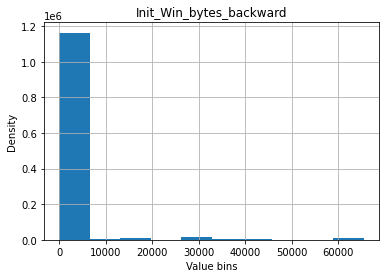

In [ ]:
if 'Init_Win_bytes_backward' in df.columns:
    df['Init_Win_bytes_backward'].hist(figsize=(6,4), bins=10);
    plt.title("Init_Win_bytes_backward")
    plt.xlabel("Value bins")
    plt.ylabel("Density")
    plt.savefig('Init_Win_bytes_backward.png', dpi=300)

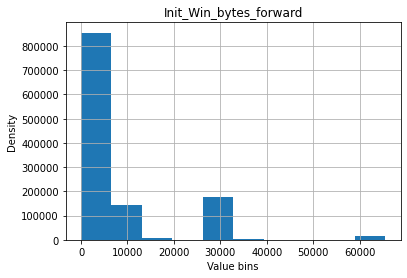

In [ ]:
if 'Init_Win_bytes_forward' in df.columns:
    df['Init_Win_bytes_forward'].hist(figsize=(6,4), bins=10);
    plt.title("Init_Win_bytes_forward")
    plt.xlabel("Value bins")
    plt.ylabel("Density")
    plt.savefig('Init_Win_bytes_forward.png', dpi=300)

In [6]:
excluded2 = ['Init_Win_bytes_backward', 'Init_Win_bytes_forward']
df = df.drop(columns=excluded2, errors='ignore')

In [7]:
y = df['Label'].values
X = df.drop(columns=['Label'])
print(X.shape, y.shape)

(1204915, 74) (1204915,)


## Feature importance

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

unique, counts = np.unique(y_train, return_counts=True)
dict(zip(unique, counts))

{0: 465685, 1: 377755}

### Visualization of the decision tree, importance evaluation using a single tree (DecisionTreeClassifier)
 

In [9]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
decision_tree = DecisionTreeClassifier(max_leaf_nodes=5, random_state=0)
decision_tree = decision_tree.fit(X_train, y_train)
cross_val_score(decision_tree, X_train, y_train, cv=10)

array([0.97321683, 0.9724106 , 0.97206677, 0.97198378, 0.97150953,
       0.9722209 , 0.97209049, 0.97301527, 0.97159253, 0.97160438])

In [10]:
from sklearn.tree import export_text
r = export_text(decision_tree, feature_names=X_train.columns.to_list())
print(r)

|--- Bwd Packet Length Std <= 1495.59
|   |--- Average Packet Size <= 7.69
|   |   |--- Bwd Header Length <= 22.00
|   |   |   |--- class: 1
|   |   |--- Bwd Header Length >  22.00
|   |   |   |--- FIN Flag Count <= 0.50
|   |   |   |   |--- class: 0
|   |   |   |--- FIN Flag Count >  0.50
|   |   |   |   |--- class: 1
|   |--- Average Packet Size >  7.69
|   |   |--- class: 0
|--- Bwd Packet Length Std >  1495.59
|   |--- class: 1



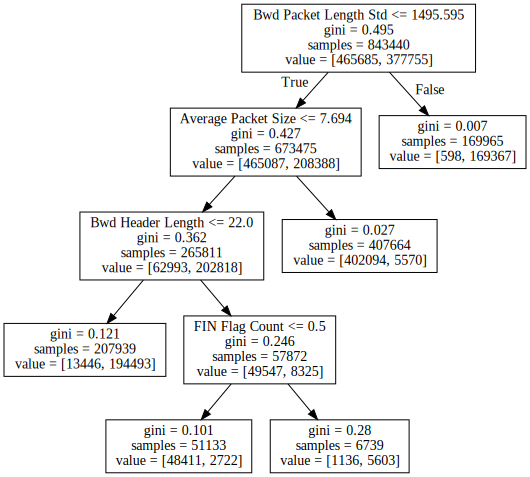

In [11]:
from graphviz import Source
from sklearn import tree
Source(tree.export_graphviz(decision_tree, out_file=None, feature_names=X.columns))

Analyze the confusion matrix. Which classes are confidently classified by the model?

In [ ]:
unique, counts = np.unique(y_test, return_counts=True)
dict(zip(unique, counts))

{0: 199601, 1: 161874}

In [ ]:
from sklearn.metrics import confusion_matrix
y_pred = decision_tree.predict(X_test)
confusion_matrix(y_test, y_pred)

array([[193116,   6485],
       [  3385, 158489]])

### Importance evaluation using SelectFromModel (still one decision tree)


In [ ]:
from sklearn.feature_selection import SelectFromModel
sfm = SelectFromModel(estimator=decision_tree).fit(X_train, y_train)
sfm.estimator_.feature_importances_

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.34372844, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.15216563,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.01934663, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.4847593 , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        ])

In [ ]:
sfm.threshold_

0.013513513513513514

In [ ]:
X_train_new = sfm.transform(X_train)
print("Original num features: {}, selected num features: {}"
      .format(X_train.shape[1], X_train_new.shape[1]))

Original num features: 74, selected num features: 4


In [ ]:
indices = np.argsort(decision_tree.feature_importances_)[::-1]
for idx, i in enumerate(indices[:10]):
    print("{}.\t{} - {}".format(idx, X_train.columns[i], decision_tree.feature_importances_[i]))

0.	Average Packet Size - 0.4847592967746556
1.	Bwd Packet Length Std - 0.34372844337232183
2.	Bwd Header Length - 0.1521656320990684
3.	FIN Flag Count - 0.019346627753954213
4.	Bwd IAT Std - 0.0
5.	Fwd IAT Std - 0.0
6.	Fwd IAT Max - 0.0
7.	Fwd IAT Min - 0.0
8.	Bwd IAT Total - 0.0
9.	Bwd IAT Mean - 0.0


### Evaluation of importance using RandomForestClassifier.feature_importances_ (move from one tree to a random forest, classification quality increases)

In [13]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=250, random_state=42, oob_score=True)
rf.fit(X_train, y_train)
# Score = mean accuracy on the given test data and labels
print('R^2 Training Score: {:.2f} \nR^2 Validation Score: {:.2f} \nOut-of-bag Score: {:.2f}'
      .format(rf.score(X_train, y_train), rf.score(X_test, y_test), rf.oob_score_))

R^2 Training Score: 0.99 
R^2 Validation Score: 0.99 
Out-of-bag Score: 0.99


In [16]:
features = X.columns
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]
webattack_features = []


for index, i in enumerate(indices[:20]):
    webattack_features.append(features[i])
    print('{}.\t#{}\t{:.3f}\t{}'.format(index + 1, i, importances[i], features[i]))

1.	#51	0.073	Average Packet Size
2.	#12	0.050	Bwd Packet Length Std
3.	#53	0.044	Avg Bwd Segment Size
4.	#11	0.043	Bwd Packet Length Mean
5.	#3	0.042	Total Length of Fwd Packets
6.	#7	0.040	Fwd Packet Length Mean
7.	#41	0.040	Packet Length Variance
8.	#9	0.038	Bwd Packet Length Max
9.	#39	0.037	Packet Length Mean
10.	#37	0.034	Min Packet Length
11.	#5	0.033	Fwd Packet Length Max
12.	#61	0.033	Subflow Fwd Bytes
13.	#63	0.031	Subflow Bwd Bytes
14.	#4	0.030	Total Length of Bwd Packets
15.	#34	0.030	Bwd Header Length
16.	#52	0.029	Avg Fwd Segment Size
17.	#40	0.025	Packet Length Std
18.	#6	0.025	Fwd Packet Length Min
19.	#10	0.020	Bwd Packet Length Min
20.	#38	0.020	Max Packet Length


In [21]:
indices

array([51, 12, 53, 11,  3,  7, 41,  9, 39, 37,  5, 61, 63,  4, 34, 52, 40,
        6, 10, 38, 36,  0, 62, 47, 17, 33, 13,  2, 22, 19, 60,  1, 15, 20,
       64, 14,  8, 16, 21, 23, 72, 35, 46, 45, 18, 25, 50, 24, 27, 70, 65,
       73, 68, 42, 69, 28, 26, 66, 67, 29, 71, 43, 49, 44, 48, 30, 32, 59,
       31, 55, 56, 57, 58, 54])

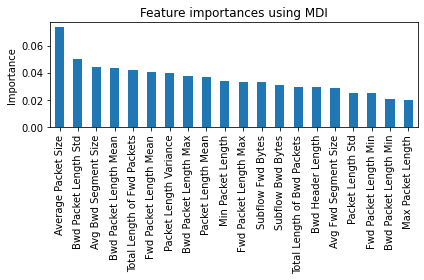

In [27]:
import pandas as pd
forest_importances = pd.Series(importances[indices[0:20]], webattack_features)

fig, ax = plt.subplots()
forest_importances.plot.bar( ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Importance")
fig.tight_layout()

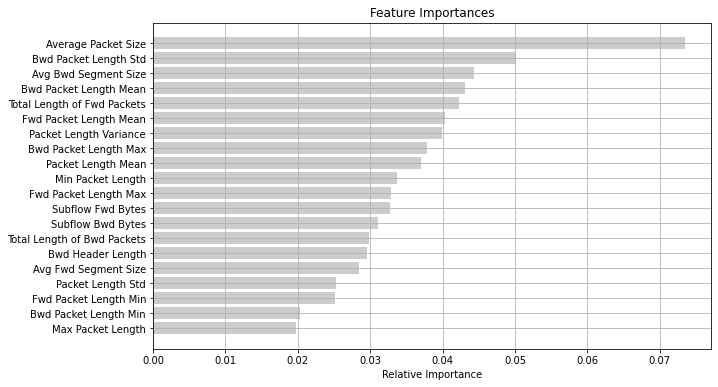

In [28]:
indices = np.argsort(importances)[-20:]
plt.rcParams['figure.figsize'] = (10, 6)
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='#cccccc', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.grid()
plt.savefig('feature_importances.png', dpi=300, bbox_inches='tight')
plt.show()

In [29]:
y_pred = rf.predict(X_test)
confusion_matrix(y_test, y_pred)

NameError: ignored

In [ ]:
max_features = 20
webattack_features = webattack_features[:max_features]
webattack_features

['Average Packet Size',
 'Bwd Packet Length Std',
 'Avg Bwd Segment Size',
 'Bwd Packet Length Mean',
 'Total Length of Fwd Packets',
 'Fwd Packet Length Mean',
 'Packet Length Variance',
 'Bwd Packet Length Max',
 'Packet Length Mean',
 'Min Packet Length',
 'Fwd Packet Length Max',
 'Subflow Fwd Bytes',
 'Subflow Bwd Bytes',
 'Total Length of Bwd Packets',
 'Bwd Header Length',
 'Avg Fwd Segment Size',
 'Packet Length Std',
 'Fwd Packet Length Min',
 'Bwd Packet Length Min',
 'Max Packet Length']

## Analysis of selected features

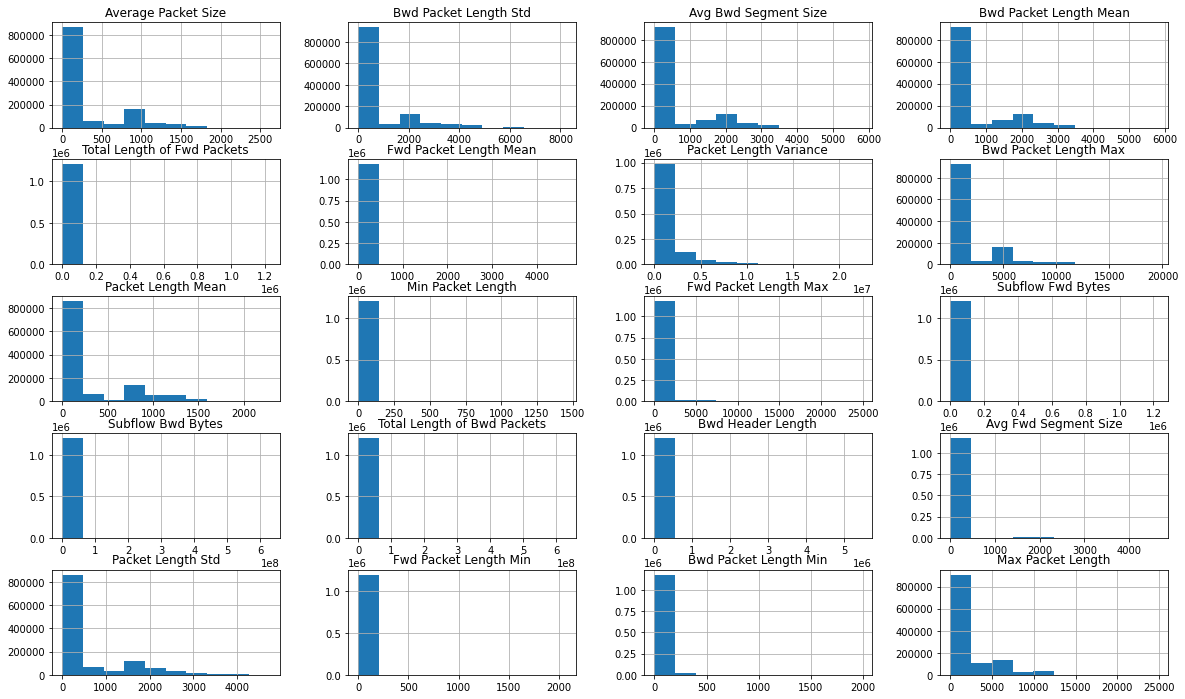

In [ ]:
df[webattack_features].hist(figsize=(20,12), bins=10);
plt.savefig('features_hist.png', dpi=300)

In [ ]:
!pip install facets-overview

In [ ]:
import base64
from facets_overview.generic_feature_statistics_generator import GenericFeatureStatisticsGenerator

gfsg = GenericFeatureStatisticsGenerator()
proto = gfsg.ProtoFromDataFrames([{'name': 'train + test', 'table': df[webattack_features]}])
protostr = base64.b64encode(proto.SerializeToString()).decode("utf-8")

In [ ]:
from IPython.core.display import display, HTML

HTML_TEMPLATE = """
        <script src="https://cdnjs.cloudflare.com/ajax/libs/webcomponentsjs/1.3.3/webcomponents-lite.js"></script>
        <link rel="import" href="https://raw.githubusercontent.com/PAIR-code/facets/1.0.0/facets-dist/facets-jupyter.html" >
        <facets-overview id="elem"></facets-overview>
        <script>
          document.querySelector("#elem").protoInput = "{protostr}";
        </script>"""
html = HTML_TEMPLATE.format(protostr=protostr)
display(HTML(html))

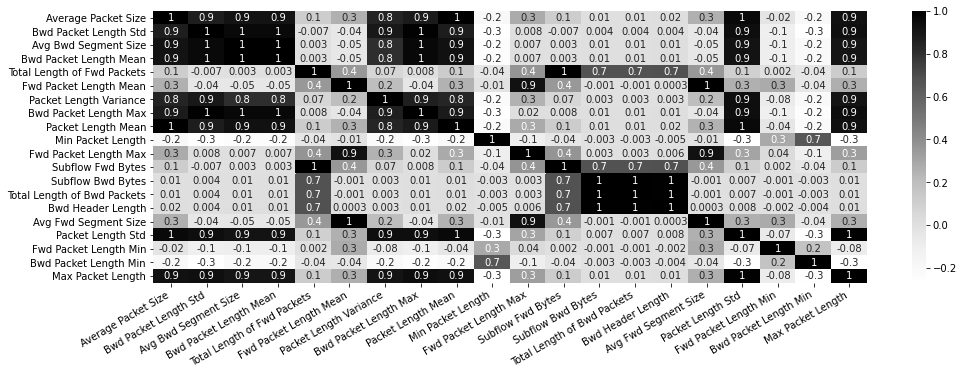

In [ ]:
import seaborn as sns
corr_matrix = df[webattack_features].corr()
plt.rcParams['figure.figsize'] = (16, 5)
g = sns.heatmap(corr_matrix, annot=True, fmt='.1g', cmap='Greys')
g.set_xticklabels(g.get_xticklabels(), verticalalignment='top', horizontalalignment='right', rotation=30);
plt.savefig('/content/drive/MyDrive/engEdosa/corr_heatmap.png', dpi=300, bbox_inches='tight')

In [ ]:
to_be_removed = {'Packet Length Mean', 'Avg Fwd Segment Size', 'Subflow Fwd Bytes', 
                 'Fwd Packets/s', 'Fwd IAT Total', 'Fwd IAT Max'}
webattack_features = [item for item in webattack_features if item not in to_be_removed]
webattack_features = webattack_features[:10]
webattack_features

['Average Packet Size',
 'Bwd Packet Length Std',
 'Avg Bwd Segment Size',
 'Bwd Packet Length Mean',
 'Total Length of Fwd Packets',
 'Fwd Packet Length Mean',
 'Packet Length Variance',
 'Bwd Packet Length Max',
 'Min Packet Length',
 'Fwd Packet Length Max']

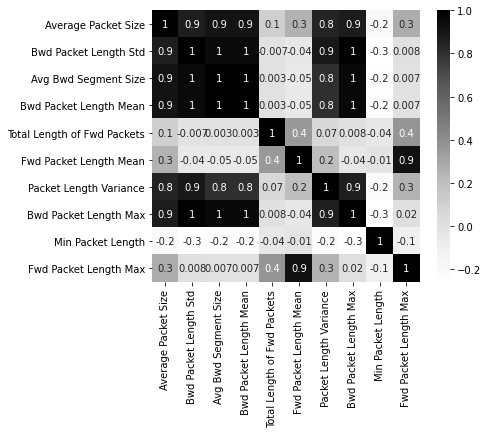

In [ ]:
corr_matrix = df[webattack_features].corr()
plt.rcParams['figure.figsize'] = (6, 5)
sns.heatmap(corr_matrix, annot=True, fmt='.1g', cmap='Greys');

## Model Training

In [30]:
y = df['Label'].values
X = df[webattack_features]
print(X.shape, y.shape)

(1204915, 20) (1204915,)


In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(843440, 20) (843440,)
(361475, 20) (361475,)


In [34]:
import pyforest
import warnings
warnings.filterwarnings("ignore")
from sklearn import metrics
from sklearn.metrics import accuracy_score

In [36]:
import lazypredict
from lazypredict.Supervised import LazyClassifier

In [1]:
clf = LazyClassifier(verbose=1, ignore_warnings=True, custom_metric = None)
models, predictions = clf.fit(X_train, X_test, y_train, y_test)
models